# Projeto 2 - Usando SKLEARN

In [1]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

 ## Heart Disease Dataset
   
    • age: The person's age in years
    • sex: The person's sex(1 = male, 0 = female)
    • cp: chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
    • trestbps: the persons resting blood pressure (mm Hg on admission to the hospital)
    • chol: serum cholestoral in mg/dl
    • fbs: fasting blood sugar (> 120 mg/dl, 1=True, 0=False)
    • restecg: resting electrocardiographic results (values 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or- definite left ventricular hypertrophy by Estes' criteria)
    • thalach: maximum heart rate achieved
    • exang: exercise induced angina(1 = yes, 0 = no)
    • oldpeak = ST depression induced by exercise relative to rest
    • slope: the slope of the peak exercise ST segment(Value 1: upsloping, Value 2: flat, Value 3: downsloping)
    • ca: number of major vessels (0-3) colored by flourosopy
    • thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    • target: Heart disease(0 = NO, 1 = YES)
    
    The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.
    
     https://deepchecks.com/what-is-data-cleaning/
     https://towardsdatascience.com/2-types-of-duplicate-features-in-machine-learning-2931de6c949b
 

## Data Exploration

In [4]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.duplicated().sum()

723

In [8]:
hd = df.drop_duplicates()
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [9]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

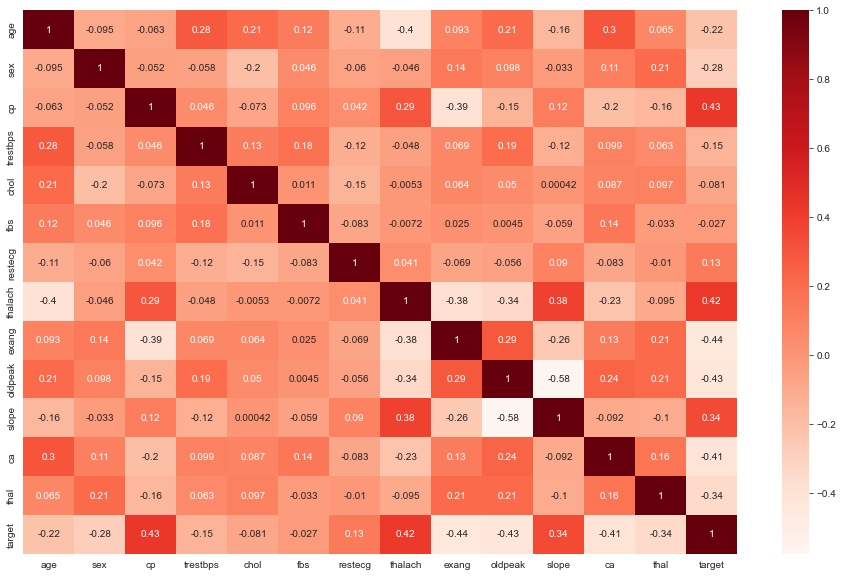

In [124]:
plt.figure(figsize = (16, 10))
sns.heatmap(hd.corr(), annot = True, cmap = 'Reds')

In [19]:
for c in hd.columns: 
    print(f'{c}: {hd[c].nunique()}')

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [20]:
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

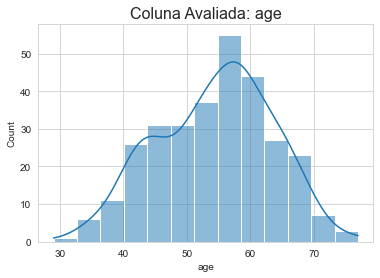

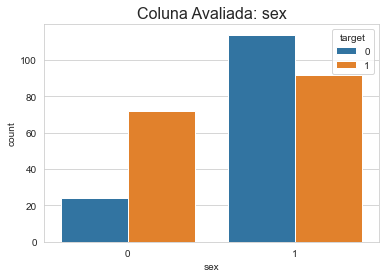

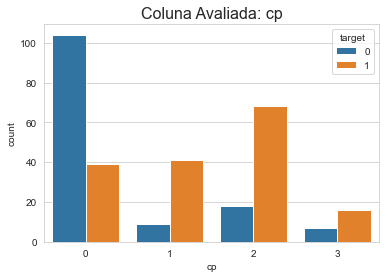

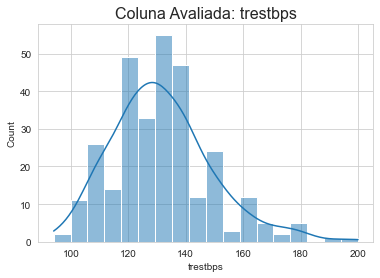

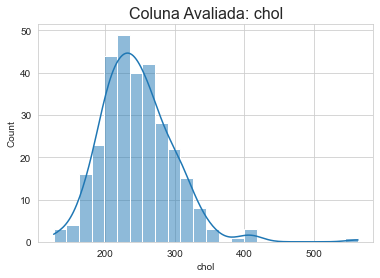

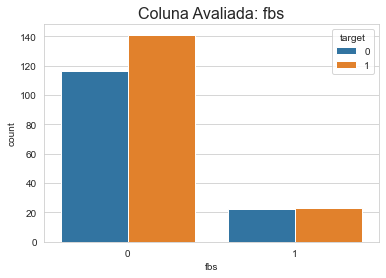

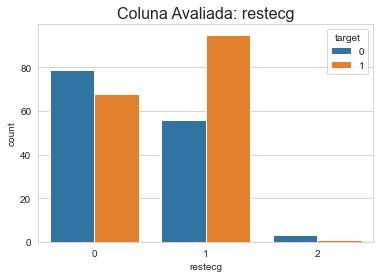

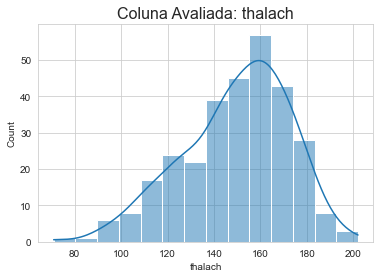

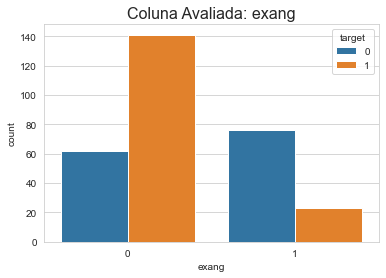

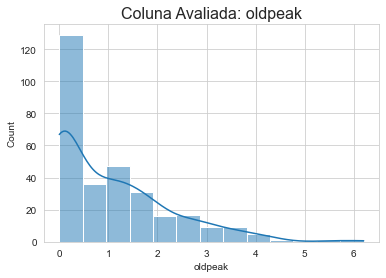

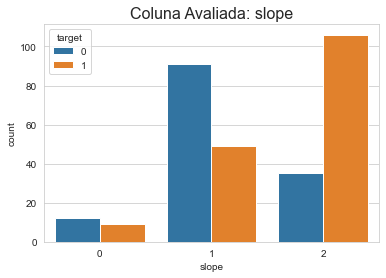

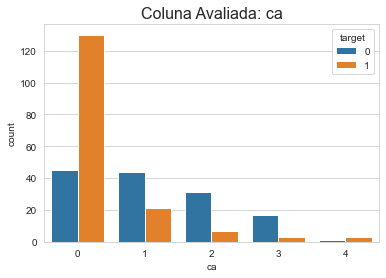

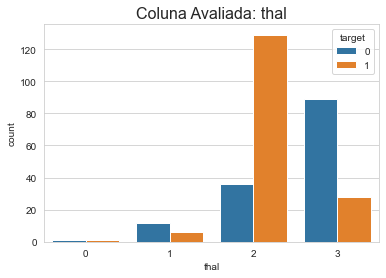

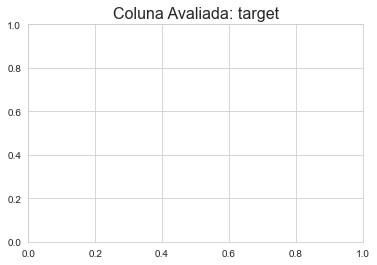

In [21]:
for c in hd.columns:
    plt.figure(figsize = (6,4))
    plt.title(f'Coluna Avaliada: {c}', fontsize = 16)
    if c in categoricas:
        sns.countplot(x = hd[c], hue = hd['target'])
    if c in numericas:
        sns.histplot(hd[c], kde = True)

## Removendo Outliers

<AxesSubplot:>

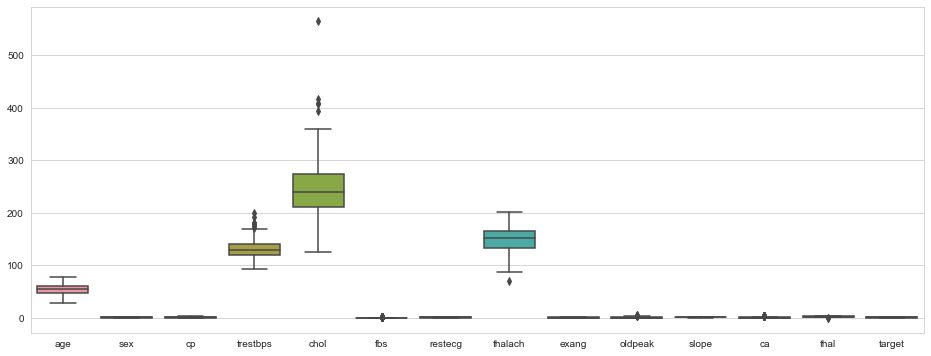

In [22]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = hd)

In [23]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
hd['trestbps'].quantile(0.99)

180.0

In [46]:
hd1 = hd[hd['trestbps'] < hd['trestbps'].quantile(0.99)]

<AxesSubplot:>

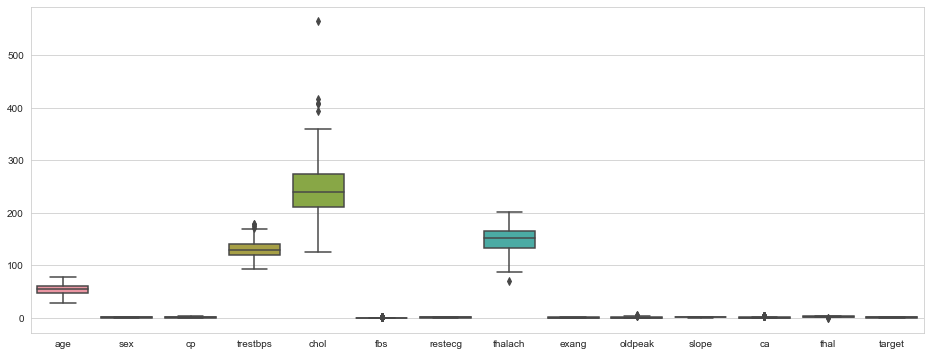

In [47]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = hd1)

In [48]:
hd1['chol'].quantile(0.98)

354.4799999999999

In [49]:
hd2 = hd1[hd1['chol'] < hd1['chol'].quantile(0.98)]

<AxesSubplot:>

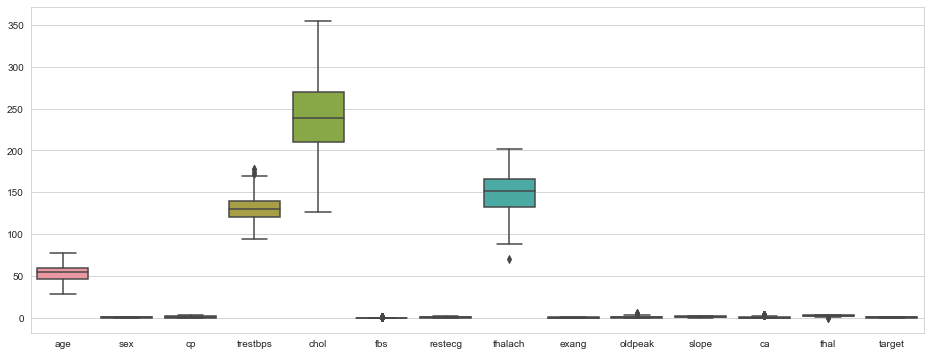

In [50]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = hd2)

In [41]:
hd2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,54.237288,0.698305,0.966102,131.474576,242.501695,0.149153,0.535593,149.416949,0.328814,1.030847,1.396610,0.715254,2.311864,0.538983
std,9.055646,0.459774,1.032896,17.607161,44.156946,0.356844,0.526108,23.143130,0.470580,1.160385,0.618855,1.003533,0.615305,0.499325
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.700000,1.000000,0.000000,2.000000,1.000000
75%,60.500000,1.000000,2.000000,140.000000,272.000000,0.000000,1.000000,166.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,353.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [51]:
hd1['thalach'].quantile(0.005)

88.96

In [53]:
hd3 = hd2[hd2['thalach'] > hd2['thalach'].quantile(0.005)]

<AxesSubplot:>

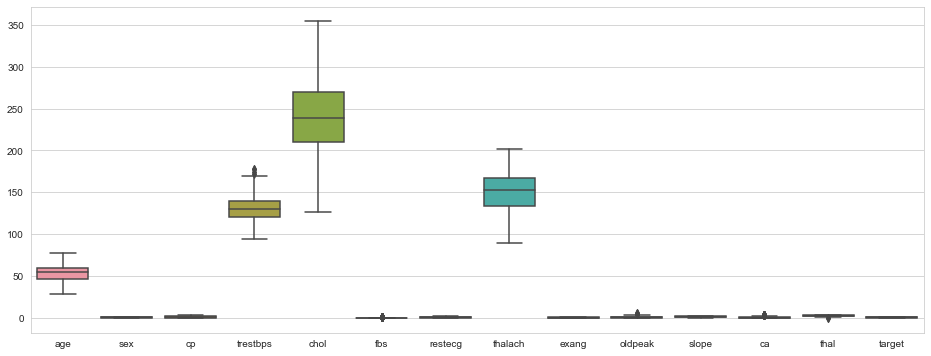

In [54]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = hd3)

## Model Preparation

In [ ]:
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [56]:
hd4 = pd.get_dummies(hd3, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first = True)
hd4

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,140,203,155,3.1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
733,44,108,141,175,0.6,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
739,52,128,255,161,0.0,0,1,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,59,160,273,125,0.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [61]:
X = hd4.drop('target', axis =1)
y = hd4['target']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
109,54,110,206,108,0.0,1,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
74,48,130,256,150,0.0,1,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
71,61,140,207,138,1.9,1,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
94,62,128,208,140,0.0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
26,44,130,233,179,0.4,1,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,64,140,313,133,0.2,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
80,50,140,233,163,0.6,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
129,57,140,192,148,0.4,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
599,63,140,195,179,0.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [98]:
log = LogisticRegression(max_iter=1000)

In [99]:
log.fit(X_train, y_train)

C:\Users\nascimentod\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [85]:
log.score(X_train, y_train)

0.8701298701298701

In [86]:
log.score(X_test, y_test)

0.8275862068965517

In [87]:
####

y_previsto = log.predict(X_test)

In [88]:
accuracy_score(y_test, y_previsto)

0.8275862068965517

In [75]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58



In [89]:
confusion_matrix(y_test, y_previsto)

array([[17,  7],
       [ 3, 31]], dtype=int64)

----

In [100]:
def relatorio_ml(df, algoritmo, opt = 2):
    X = hd4.drop('target', axis =1)
    y = hd4['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    if opt == 0:
        ml = algoritmo(max_iter = 1000)
    elif opt == 1:
        ml = algoritmo(n_estimators = 1000)
    elif opt == 2:
        ml = algoritmo()
        
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f'Acuracia treino: {score_train * 100:.2f}%')
    score_test = ml.score(X_test, y_test)
    print(f'Acuracia teste: {score_test * 100:.2f}%')
    
    y_previsto = log.predict(X_test)
    print('------ CLASSIFICATION REPORT------')
    print(classification_report(y_test, y_previsto))
    print('------ CONFUSION MATRIX-----')
    confusao = confusion_matrix(y_test, y_previsto)
    sns.heatmap(confusao, annot = True, cmap = 'Reds')
    
    return score_train, score_test

C:\Users\nascimentod\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acuracia treino: 87.45%
Acuracia teste: 82.76%
------ CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

------ CONFUSION MATRIX-----


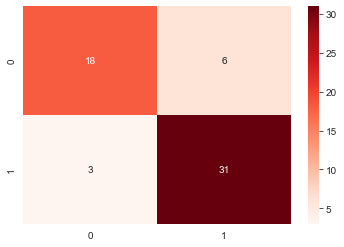

In [102]:
log_train, log_test = relatorio_ml(hd4, LogisticRegression)

Acuracia treino: 100.00%
Acuracia teste: 74.14%
------ CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

------ CONFUSION MATRIX-----


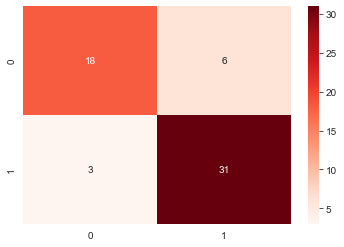

In [103]:
tree_train, tree_test = relatorio_ml(hd4, DecisionTreeClassifier)

Acuracia treino: 92.21%
Acuracia teste: 81.03%
------ CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

------ CONFUSION MATRIX-----


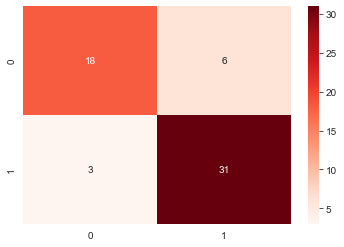

In [104]:
ada_train, ada_test = relatorio_ml(hd4, AdaBoostClassifier)

Acuracia treino: 77.06%
Acuracia teste: 60.34%
------ CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

------ CONFUSION MATRIX-----


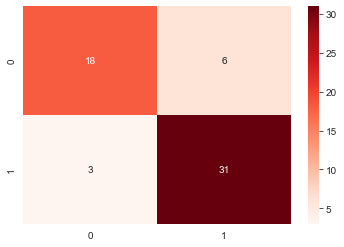

In [105]:
kn_train, kn_test = relatorio_ml(hd4, KNeighborsClassifier)

Acuracia treino: 100.00%
Acuracia teste: 74.14%
------ CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

------ CONFUSION MATRIX-----


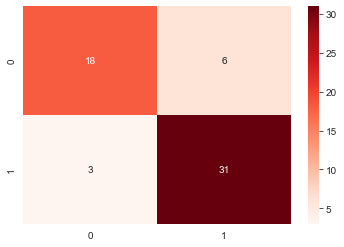

In [106]:
rand_train, rand_test = relatorio_ml(hd4, RandomForestClassifier)

In [107]:
data = {'Models': ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Random Forest Classifier', 'Ada Boost'],
       'Acuracia Treino': [round(log_train * 100, 2), round(tree_train * 100, 2), round(kn_train *100, 2),
                          round(rand_train * 100, 2), round(ada_train * 100, 2)],
       'Acuracia Teste':  [round(log_test * 100, 2), round(tree_test * 100, 2), round(kn_test *100, 2),
                          round(rand_test * 100, 2), round(ada_test * 100, 2)], 
       }

df = pd.DataFrame(data)
df.sort_values(by= 'Acuracia Teste', ascending = False, inplace = True)
df

,Models,Acuracia Treino,Acuracia Teste
0,Logistic Regression,87.45,82.76
4,Ada Boost,92.21,81.03
1,Decision Tree,100.00,74.14
3,Random Forest Classifier,100.00,74.14
2,KNeighbors,77.06,60.34


In [119]:
def relatorio_ml_scaler(df, algoritmo, opt = 2):
    X = hd4.drop('target', axis =1)
    y = hd4['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    cols_scaler = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler])
    X_test[cols_scaler] = scaler.transform(X_test[cols_scaler])
    
    if opt == 0:
        ml = algoritmo(max_iter = 1000)
    elif opt == 1:
        ml = algoritmo(n_estimators = 1000)
    elif opt == 2:
        ml = algoritmo()
        
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f'Acuracia treino: {score_train * 100:.2f}%')
    score_test = ml.score(X_test, y_test)
    print(f'Acuracia teste: {score_test * 100:.2f}%')
    
    y_previsto = log.predict(X_test)
    print('------ CLASSIFICATION REPORT------')
    print(classification_report(y_test, y_previsto))
    print('------ CONFUSION MATRIX-----')
    confusao = confusion_matrix(y_test, y_previsto)
    sns.heatmap(confusao, annot = True, cmap = 'Reds')
    
    return score_train, score_test

Acuracia treino: 87.01%
Acuracia teste: 84.48%
------ CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

------ CONFUSION MATRIX-----


C:\Users\nascimentod\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\nascimentod\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


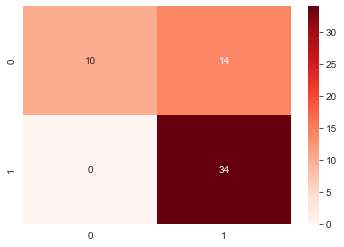

In [121]:
log_train_scaler, log_test_scaler = relatorio_ml_scaler(hd4, LogisticRegression)

In [118]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
109,0.037193,-1.284776,-0.749780,-1.848487,-0.901757,1,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
74,-0.623695,0.005025,0.330285,0.001907,-0.901757,1,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
71,0.808228,0.649926,-0.728179,-0.526777,0.741170,1,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
94,0.918376,-0.123955,-0.706578,-0.438663,-0.901757,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
26,-1.064287,0.005025,-0.166545,1.279561,-0.555878,1,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,1.138672,0.649926,1.561559,-0.747062,-0.728818,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
80,-0.403399,0.649926,-0.166545,0.574648,-0.382938,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
129,0.367637,0.649926,-1.052198,-0.086207,-0.555878,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
599,1.028524,0.649926,-0.987394,1.279561,-0.901757,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
